In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
filepath = '/content/drive/MyDrive/AccesslogAnalysis/data/SpecificUserInfo_20201209-20210531.csv'

In [ ]:
df = pd.read_csv(filepath, encoding='euc-kr', index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392562 entries, 0 to 2904
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   user_index                     392562 non-null  int64 
 1   ip                             392562 non-null  object
 2   first_access_time              392562 non-null  object
 3   first_access_location          392561 non-null  object
 4   total_request_processing_time  392562 non-null  int64 
 5   total_transfer_bytes           392562 non-null  int64 
 6   user_agent                     392562 non-null  object
 7   os                             392562 non-null  object
 8   os_version                     384712 non-null  object
 9   browser                        392562 non-null  object
 10  browser_version                379360 non-null  object
 11  device                         392562 non-null  object
 12  device_brand                   299123 non-null

In [ ]:
df.head()

In [ ]:
df = df.drop(columns='user_index')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392562 entries, 0 to 2904
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ip                             392562 non-null  object
 1   first_access_time              392562 non-null  object
 2   first_access_location          392561 non-null  object
 3   total_request_processing_time  392562 non-null  int64 
 4   total_transfer_bytes           392562 non-null  int64 
 5   user_agent                     392562 non-null  object
 6   os                             392562 non-null  object
 7   os_version                     384712 non-null  object
 8   browser                        392562 non-null  object
 9   browser_version                379360 non-null  object
 10  device                         392562 non-null  object
 11  device_brand                   299123 non-null  object
 12  device_model                   299111 non-null

In [ ]:
df = df.loc[df['first_access_time'] >= '2021-01-05']

In [ ]:
df['first_access_time'] = pd.to_datetime(df['first_access_time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['first_access_time'].head()

0   2021-01-05 00:00:13
1   2021-01-05 00:00:21
2   2021-01-05 00:00:49
3   2021-01-05 00:00:54
4   2021-01-05 00:01:15
Name: first_access_time, dtype: datetime64[ns]

In [ ]:
df['year'] = df['first_access_time'].dt.year
df['month'] = df['first_access_time'].dt.month
df['weekday'] = df['first_access_time'].dt.weekday
df['day'] = df['first_access_time'].dt.day
df['hour'] = df['first_access_time'].dt.hour

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355956 entries, 0 to 2904
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ip                             355956 non-null  object        
 1   first_access_time              355956 non-null  datetime64[ns]
 2   first_access_location          355955 non-null  object        
 3   total_request_processing_time  355956 non-null  int64         
 4   total_transfer_bytes           355956 non-null  int64         
 5   user_agent                     355956 non-null  object        
 6   os                             355956 non-null  object        
 7   os_version                     348838 non-null  object        
 8   browser                        355956 non-null  object        
 9   browser_version                344070 non-null  object        
 10  device                         355956 non-null  object        
 11  de

In [ ]:
df.head()

,ip,first_access_time,first_access_location,total_request_processing_time,total_transfer_bytes,user_agent,os,os_version,browser,browser_version,device,device_brand,device_model,total_stay_time,reservation,cancel,actions,year,month,weekday,day,hour
0,112.157.99.240,2021-01-05 00:00:13,포도호텔 모바일 객실예약 마감 여부 체크,4177,41749771,Mozilla/5.0 (Linux; Android 10; SM-G973N Build...,Android,10,Crosswalk,23.69.591,Samsung SM-G973N,Samsung,SM-G973N,54730,0,0,포도호텔 모바일 객실예약 마감 여부 체크 -> 0s -> 포도호텔 모바일 디럭스 한...,2021,1,1,5,0
1,121.169.34.158,2021-01-05 00:00:21,youtube.com,2251,6305683,Mozilla/5.0 (Linux; Android 10; SM-T866N) Appl...,Android,10,Chrome,87.0.4280,Samsung SM-T866N,Samsung,SM-T866N,1,0,0,youtube.com -> 0s -> 디아넥스 웹 홈페이지 -> 1s -> 디아넥스...,2021,1,1,5,0
2,218.237.150.132,2021-01-05 00:00:49,디아넥스 웹 홈페이지,813,8421768,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:8...,Windows,10,Firefox,84.0,Other,NaN,NaN,30,0,0,디아넥스 웹 홈페이지 -> 4s -> 디아넥스 웹 객실 스위트 B 안내 -> 26s...,2021,1,1,5,0
3,112.155.115.136,2021-01-05 00:00:54,디아넥스 모바일 레스토랑 메뉴 안내,812,5259980,Mozilla/5.0 (Linux; Android 8.1.0; LM-X415L Bu...,Android,8.1.0,Chrome Mobile WebView,87.0.4280,LM-X415L,Generic_Android,LM-X415L,0,0,0,디아넥스 모바일 레스토랑 메뉴 안내,2021,1,1,5,0
4,218.234.132.104,2021-01-05 00:01:15,search.naver.com,5180,45184546,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Windows,10,Chrome,87.0.4280,Other,NaN,NaN,2054,0,0,search.naver.com -> 0s -> 포도호텔 웹 홈페이지 -> 34s -...,2021,1,1,5,0


# 월별

## 접속자 현황

In [ ]:
users_num_by_month = df.groupby(by='month').count()['ip']
users_num_by_month

month
1    47716
2    71938
3    80665
4    77576
5    78061
Name: ip, dtype: int64

In [ ]:
(df.groupby(by=['month', 'day'], as_index=False)['ip'].count()).groupby(by='month')['ip'].mean()

month
1    1767.259259
2    2569.214286
3    2602.096774
4    2585.866667
5    2518.096774
Name: ip, dtype: float64

 1. 1월은 일 평균 약 1700명의 접속자가 있으며, 다른 달 대비 약 1000명 적음
 2. 일 평균 약 2500명 이상의 접속자가 있으며, 1월에는 01/01~01/04의 4일분 데이터를 평균 접속자수로 채워넣어도 다른 월 대비 약 10000명 이상 접속자가 적음
 3. 따라서 시스템적 문제로 인해 4일분의 Tomcat 로그 파일이 미수집되었고, 접속자 자체가 1월에는 적었다고 판단됨
 4. 따라서 1월 전체 데이터를 미사용하고 2월~5월 분의 데이터만 활용하거나 1월 평균 접속자수를 결측되는 4일분의 데이터로 활용하는 것이 어떨까 싶음

## 접속자 추이

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(users_num_by_month)
plt.grid()
plt.xlabel('month', fontsize=13)
plt.ylabel('users_num', fontsize=13)
plt.xticks(range(1, max(users_num_by_month.index)+1))
plt.tight_layout()
plt.show()

In [ ]:
(df.groupby(by=['month', 'day']).count()['ip']).groupby('month').mean()

 1. 3월의 접속자 수가 가장 많음
 2. 1월은 시스템적 문제와 4일 적재가 부족하여 총량이 적게 나옴(?) - 원인파악필요
 3. 3월의 접속자 수가 약 8만명, 2월의 접속자 수는 약 7.2만명으로 2월 대비 3월이 8천명 많은 접속을 보임
 4. 그러나, 일평균 접속자수는 약 2500~2600명 수준으로 큰 차이는 없음

## 예약자 현황

In [ ]:
db_df = pd.read_csv('/content/drive/MyDrive/AccesslogAnalysis/data/DBreservation_table.csv')
db_df.head()

,reserve_num,insert_date,hotel_name,status
0,P210101387,2021-01-01 01:42:22,THEANNEX,canceled
1,P210101388,2021-01-01 09:01:59,PODO,canceled
2,P210101389,2021-01-01 09:02:45,PODO,canceled
3,P210101390,2021-01-01 09:05:13,PODO,canceled
4,P210101391,2021-01-01 09:10:42,PODO,canceled


In [ ]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   reserve_num  1678 non-null   object
 1   insert_date  1678 non-null   object
 2   hotel_name   1678 non-null   object
 3   status       1678 non-null   object
dtypes: object(4)
memory usage: 52.6+ KB


In [ ]:
db_df['insert_date'] = db_df.loc[db_df['insert_date'] >= '2021-01-05', 'insert_date']
db_df.head()

,reserve_num,insert_date,hotel_name,status
0,P210101387,NaN,THEANNEX,canceled
1,P210101388,NaN,PODO,canceled
2,P210101389,NaN,PODO,canceled
3,P210101390,NaN,PODO,canceled
4,P210101391,NaN,PODO,canceled


In [ ]:
db_df = db_df.dropna(axis=0).reset_index(drop=True)
db_df.head()

,reserve_num,insert_date,hotel_name,status
0,P210105417,2021-01-05 14:40:42,PODO,confirmed
1,P210105418,2021-01-05 14:52:48,PODO,canceled
2,P210105419,2021-01-05 15:49:49,THEANNEX,confirmed
3,P210105420,2021-01-05 22:25:20,THEANNEX,canceled
4,P210106421,2021-01-06 08:22:51,PODO,confirmed


In [ ]:
db_df['year'] = pd.to_datetime(db_df['insert_date']).dt.year
db_df['month'] = pd.to_datetime(db_df['insert_date']).dt.month
db_df['weekday'] = pd.to_datetime(db_df['insert_date']).dt.weekday
db_df['day'] = pd.to_datetime(db_df['insert_date']).dt.day
db_df['hour'] = pd.to_datetime(db_df['insert_date']).dt.hour
db_df.head()

,reserve_num,insert_date,hotel_name,status,year,month,weekday,day,hour
0,P210105417,2021-01-05 14:40:42,PODO,confirmed,2021,1,1,5,14
1,P210105418,2021-01-05 14:52:48,PODO,canceled,2021,1,1,5,14
2,P210105419,2021-01-05 15:49:49,THEANNEX,confirmed,2021,1,1,5,15
3,P210105420,2021-01-05 22:25:20,THEANNEX,canceled,2021,1,1,5,22
4,P210106421,2021-01-06 08:22:51,PODO,confirmed,2021,1,2,6,8


In [ ]:
db_df.groupby('month').count()['reserve_num']

month
1    119
2    285
3    402
4    392
5    450
Name: reserve_num, dtype: int64

In [ ]:
df.groupby('month').sum()['reservation']

month
1     807
2    1832
3    2427
4    2460
5    2320
Name: reservation, dtype: int64

In [ ]:
df['real_reservation'] = df['actions'].apply(lambda x: True if '객실예약 완료' in x else False)

In [ ]:
df.groupby('month').sum()['real_reservation']

month
1    123
2    268
3    376
4    376
5    430
Name: real_reservation, dtype: int64

In [ ]:
tmp_ = pd.concat([db_df.groupby('month').count()['reserve_num'], df.groupby('month').sum()['real_reservation']], axis=1)
tmp_.columns = ['db_reserv_num', 'accesslog_reserv_num']
tmp_

,db_reserv_num,accesslog_reserv_num
month,,
1,119,123
2,285,268
3,402,376
4,392,376
5,450,430


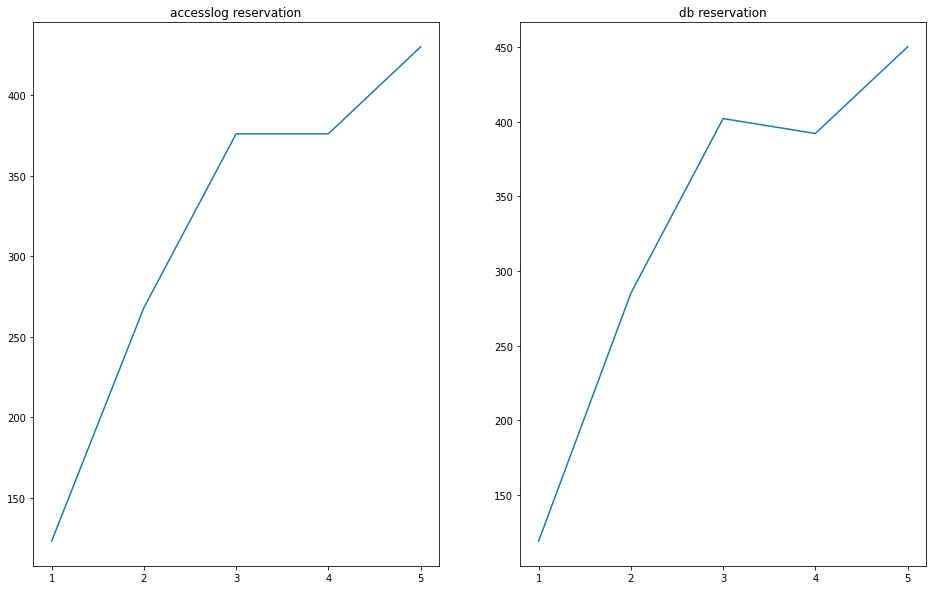

In [ ]:
plt.figure(figsize=(16, 10))
plt.subplot(1,2,1)
plt.plot(df.groupby('month').sum()['real_reservation'])
plt.xticks(range(1, 6, 1))
plt.title('accesslog reservation')

plt.subplot(1,2,2)
plt.plot(db_df.groupby('month').count()['reserve_num'])
plt.xticks(range(1, 6, 1))
plt.title('db reservation')
plt.show()

 1. 현재 accesslog reservation 의 예약자 수와 실제 DB 예약자 수와는 차이가 큼
 2. 적용한 예약자 룰('예약 완료' or '예약 결제' String)이 틀린것으로 보임
 3. '객실예약 완료'를 예약자라고 하였을 경우 실제 DB 예약자 수와 비슷한 수치를 보임
 4. 룰 변경이 필요할 것으로 판단 됨
 5. 관리자가 직접 예약을 취소한 경우에는 Accesslog에서 발췌가 불가

## 호텔별 예약자 추이

In [ ]:
db_df['hotel_name'].unique()

array(['PODO', 'THEANNEX'], dtype=object)

In [ ]:
db_df['hotel_name'].value_counts()

PODO        865
THEANNEX    783
Name: hotel_name, dtype: int64

In [ ]:
db_df.groupby(['month', 'hotel_name']).count()[['reserve_num']]

reserve_num
month hotel_name             
1     PODO                 35
      THEANNEX             84
2     PODO                137
      THEANNEX            148
3     PODO                218
      THEANNEX            184
4     PODO                220
      THEANNEX            172
5     PODO                255
      THEANNEX            195

In [ ]:
podo_df = pd.DataFrame()
podo_df['reserve_users'] = db_df[db_df['hotel_name'] == 'PODO'].groupby('month').count()['reserve_num']
podo_df['access_users'] = df.groupby('month').count()['ip']
podo_df['reserve_rate'] = podo_df['reserve_users'] / podo_df['access_users']
podo_df

,reserve_users,access_users,reserve_rate
month,,,
1,35,47716,0.000734
2,137,71938,0.001904
3,218,80665,0.002703
4,220,77576,0.002836
5,255,78061,0.003267


In [ ]:
annex_df = pd.DataFrame()
annex_df['reserve_users'] = db_df[db_df['hotel_name'] == 'THEANNEX'].groupby('month').count()['reserve_num']
annex_df['access_users'] = df.groupby('month').count()['ip']
annex_df['reserve_rate'] = annex_df['reserve_users'] / annex_df['access_users']
annex_df

,reserve_users,access_users,reserve_rate
month,,,
1,84,47716,0.001760
2,148,71938,0.002057
3,184,80665,0.002281
4,172,77576,0.002217
5,195,78061,0.002498


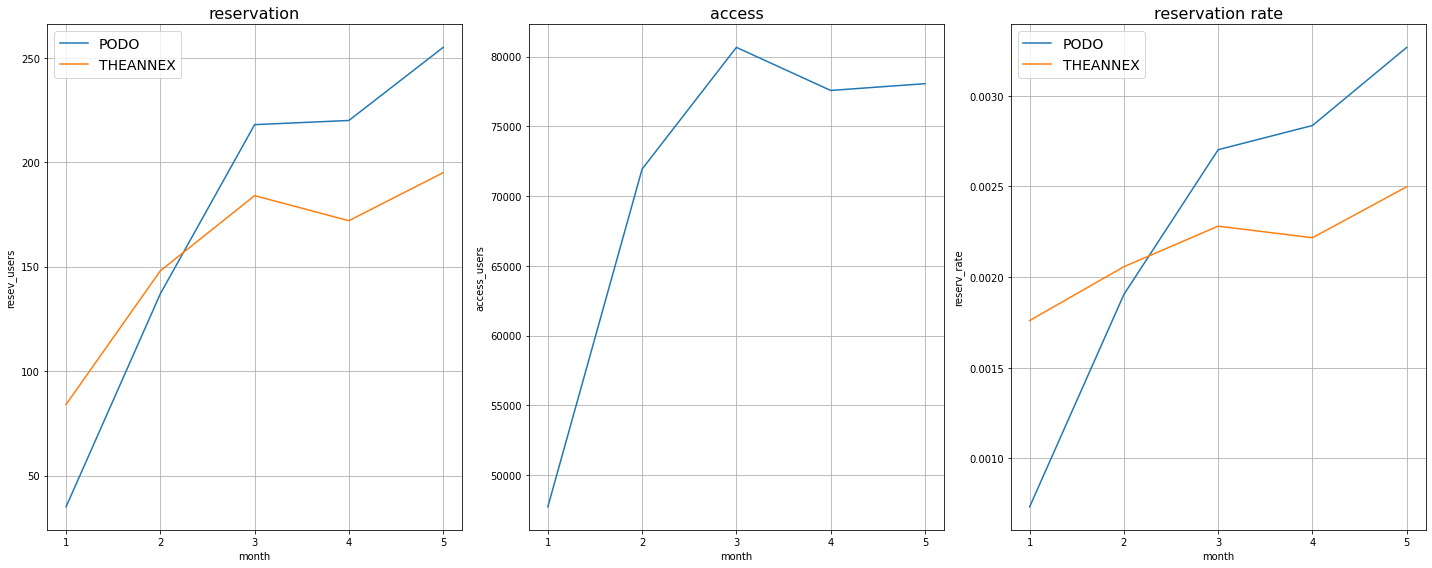

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('reservation', fontsize=16)
plt.plot(podo_df.index, podo_df['reserve_users'], label='PODO')
plt.plot(annex_df.index, annex_df['reserve_users'], label='THEANNEX')
plt.xticks(range(1, 6, 1))
plt.xlabel('month')
plt.ylabel('resev_users')
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.title('access', fontsize=16)
plt.plot(podo_df.index, podo_df['access_users'])
plt.xticks(range(1, 6, 1))
plt.xlabel('month')
plt.ylabel('access_users')
plt.grid()
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.title('reservation rate', fontsize=16)
plt.plot(podo_df.index, podo_df['reserve_rate'], label='PODO')
plt.plot(annex_df.index, annex_df['reserve_rate'], label='THEANNEX')
plt.xticks(range(1, 6, 1))
plt.xlabel('month')
plt.ylabel('reserv_rate')
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()

plt.show()

 1. 접속자 수의 경향과 비슷한 경향을 보이는 호텔 예약자 추이는 디아넥스 호텔로 보임.(접속자수에 따라서 비례하는 듯한 형태)
 2. PODO 호텔의 경우 예약자가 꾸준히 증가하고 있는 것으로 보이며, 접속자가 떨어졌어진 3~5월에서도 가장 높은 예약률을 보임
 3. 2월 이후부턴 PODO 호텔이 THEANNEX의 예약자 수를 따라잡은 것으로보아 특정 프로모션 혹은 객실 예약 등이 오픈한 이벤트가 있었을 수 있을 것 같음

# 요일별

## 접속자 현황

In [ ]:
users_num_by_weekday = df.groupby(by='weekday').count()['ip']

In [ ]:
weekday_users_num_by_month = df.groupby(by=['month', 'weekday']).count()['ip']

## 접속자 추이

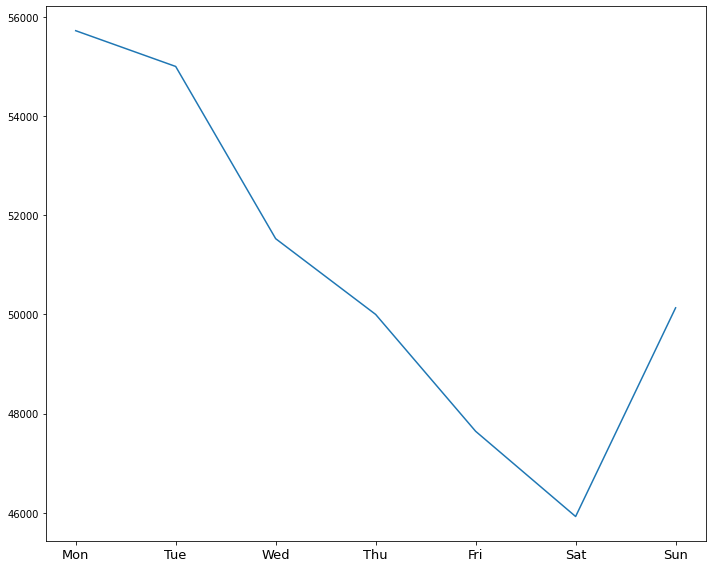

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(users_num_by_weekday)
plt.xticks(users_num_by_weekday.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
weekday_count_by_month = {1: [3, 4, 4, 4, 4, 4, 4],
                        2: [4, 4, 4, 4, 4, 4, 4],
                        3: [5, 5, 5, 4, 4, 4, 4],
                        4: [4, 4, 4, 5, 5, 4, 4],
                        5: [5, 4, 4, 4, 4, 5, 5]}

weekday_count_df = pd.DataFrame(weekday_count_by_month)
weekday_count_df

,1,2,3,4,5
0,3,4,5,4,5
1,4,4,5,4,4
2,4,4,5,4,4
3,4,4,4,5,4
4,4,4,4,5,4
5,4,4,4,4,5
6,4,4,4,4,5


In [ ]:
weekday_count_df.sum(axis=1)

0    21
1    21
2    21
3    21
4    21
5    21
6    21
dtype: int64

 1. 01/01-01/04 누락분을 제외하고 ~05/31까지의 요일의 갯수는 모두 각 21개씩으로 동일함
 2. 따라서 전체 접속자에 대하여 실제 접속자가 대체로 월요일에 많은 것으로 판단됨

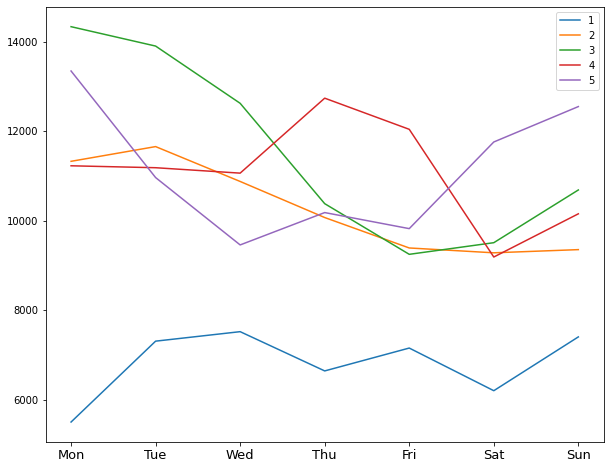

In [ ]:
month_ls = list(set([i[0] for i in weekday_users_num_by_month.index]))

plt.figure(figsize=(10, 8))
for month in month_ls:
    plt.plot(weekday_users_num_by_month.loc[(month, )], label=str(month))
plt.xticks(users_num_by_weekday.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=13)
plt.legend()
plt.show()

## 예약자 현황

In [ ]:
db_df.groupby('weekday').count()[['reserve_num']]

,reserve_num
weekday,
0,361
1,215
2,197
3,245
4,150
5,283
6,197


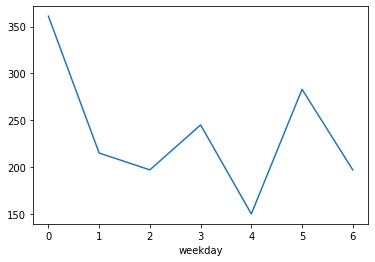

In [ ]:
db_df.groupby('weekday').count()['reserve_num'].plot()

 1. 실제 예약자 수도 월요일에 많이 분포해있음을 알 수 있음

In [ ]:
db_df.groupby(['month', 'weekday']).count()[['reserve_num']]

reserve_num
month weekday             
1     0                 13
      1                 22
      2                 16
      3                 13
      4                 13
      5                 17
      6                 25
2     0                 83
      1                 45
      2                 40
      3                 31
      4                 19
      5                 27
      6                 40
3     0                148
      1                 54
      2                 58
      3                 39
      4                 32
      5                 28
      6                 43
4     0                 51
      1                 45
      2                 41
      3                120
      4                 48
      5                 47
      6                 40
5     0                 66
      1                 49
      2                 42
      3                 42
      4                 38
      5                164
      6                 49

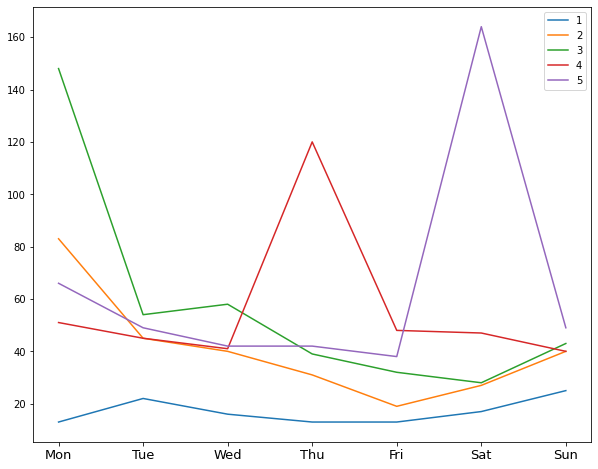

In [ ]:
month_ls = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 8))
for month in month_ls:
    plt.plot(db_df.groupby(['month', 'weekday']).count()[['reserve_num']].loc[(month, )], label=str(month))
plt.xticks(users_num_by_weekday.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=13)
plt.legend()
plt.show()

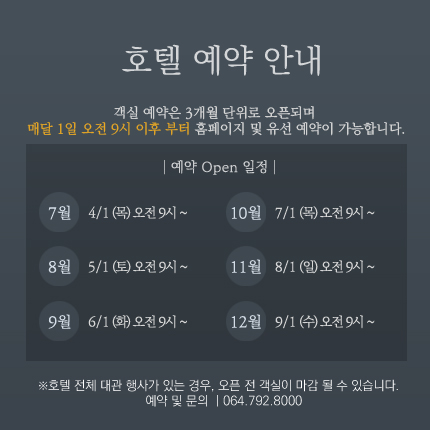

 1. 04/01(목)과 05/01(토) 예약자가 매우 높아진 이유는 상기 사진과 같이 호텔 예약의 경우 Open일정이 있어 해당 Open 일정에 영향을 많이 받는 것으로 추정됨
 2. 그 외 월요일에 특히 예약자가 많은 것은 추가 확인이 필요.

## 호텔별 예약자 추이

In [ ]:
db_df['hotel_name'].value_counts()

PODO        865
THEANNEX    783
Name: hotel_name, dtype: int64

In [ ]:
db_df.groupby('weekday').count()[['reserve_num']]

,reserve_num
weekday,
0,361
1,215
2,197
3,245
4,150
5,283
6,197


In [ ]:
_5_1_reserve_num = db_df[(db_df['month'] == 5) & (db_df['day'] == 1)].count()['reserve_num']
_5_1_reserve_num

141

In [ ]:
sat_reserve_num = db_df[(db_df['weekday'] == 5)].count()['reserve_num']
sat_reserve_num

283

In [ ]:
(_5_1_reserve_num / sat_reserve_num) * 100

49.82332155477032

 1. 5월 1일(토)에 예약자의 수가 전체 5월의 예약자의 약 49%를 차지하여 토요일의 예약자가 매우 많은 것으로 확인됨
 2. 월요일에 가장 많은 이유 추가 확인 필요

In [ ]:
db_df.groupby(['weekday', 'hotel_name']).count()[['reserve_num']]

reserve_num
weekday hotel_name             
0       PODO                211
        THEANNEX            150
1       PODO                 92
        THEANNEX            123
2       PODO                 77
        THEANNEX            120
3       PODO                152
        THEANNEX             93
4       PODO                 65
        THEANNEX             85
5       PODO                185
        THEANNEX             98
6       PODO                 83
        THEANNEX            114

In [ ]:
podo_df = pd.DataFrame()
podo_df['reserve_users'] = db_df[db_df['hotel_name'] == 'PODO'].groupby('weekday').count()['reserve_num']
podo_df['access_users'] = df.groupby('weekday').count()['ip']
podo_df['reserve_rate'] = podo_df['reserve_users'] / podo_df['access_users']
podo_df

,reserve_users,access_users,reserve_rate
weekday,,,
0,211,55721,0.003787
1,92,55000,0.001673
2,77,51528,0.001494
3,152,50001,0.003040
4,65,47645,0.001364
5,185,45927,0.004028
6,83,50134,0.001656


In [ ]:
annex_df = pd.DataFrame()
annex_df['reserve_users'] = db_df[db_df['hotel_name'] == 'THEANNEX'].groupby('weekday').count()['reserve_num']
annex_df['access_users'] = df.groupby('weekday').count()['ip']
annex_df['reserve_rate'] = annex_df['reserve_users'] / annex_df['access_users']
annex_df

,reserve_users,access_users,reserve_rate
weekday,,,
0,150,55721,0.002692
1,123,55000,0.002236
2,120,51528,0.002329
3,93,50001,0.001860
4,85,47645,0.001784
5,98,45927,0.002134
6,114,50134,0.002274


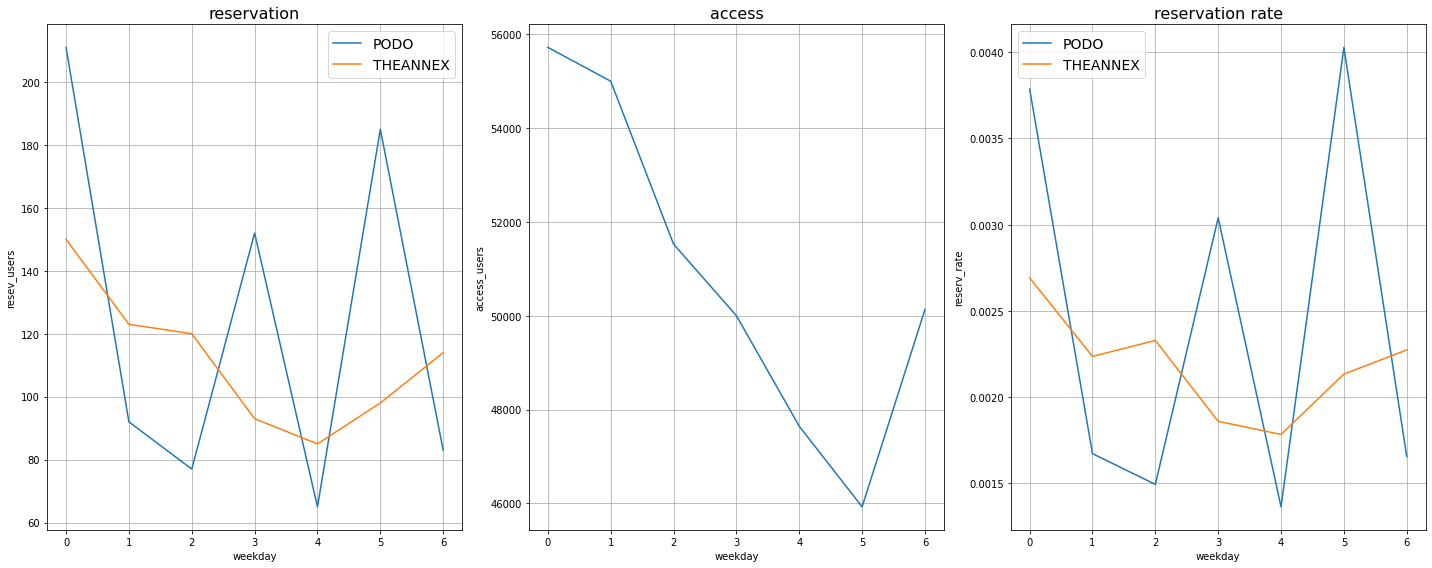

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('reservation', fontsize=16)
plt.plot(podo_df.index, podo_df['reserve_users'], label='PODO')
plt.plot(annex_df.index, annex_df['reserve_users'], label='THEANNEX')
plt.xticks(range(0, 7, 1))
plt.xlabel('weekday')
plt.ylabel('resev_users')
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.title('access', fontsize=16)
plt.plot(podo_df.index, podo_df['access_users'])
plt.xticks(range(0, 7, 1))
plt.xlabel('weekday')
plt.ylabel('access_users')
plt.grid()
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.title('reservation rate', fontsize=16)
plt.plot(podo_df.index, podo_df['reserve_rate'], label='PODO')
plt.plot(annex_df.index, annex_df['reserve_rate'], label='THEANNEX')
plt.xticks(range(0, 7, 1))
plt.xlabel('weekday')
plt.ylabel('reserv_rate')
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()

plt.show()

 1. 접속자가 가장 적은 토요일에 가장 많은 예약자가 생김
 2. 반면 월요일의 경우 가장 많은 접속자를 가지며, 예약자 수도 많음

# 일별

## 접속사 현황

In [ ]:
%python
daily_users_num = df.groupby(by='day').count()['ip']
daily_users_num

In [ ]:
%python
daily_users_num_by_month = df.groupby(by=['month', 'day']).count()['ip']
daily_users_num_by_month

## 접속자 추이

In [ ]:
%python
plt.figure(figsize=(10, 8))
plt.plot(daily_users_num)
plt.grid()
plt.show()

In [ ]:
%python
plt.figure(figsize=(10, 8))
month_ls = list(set([i[0] for i in daily_users_num_by_month.index]))

for month in month_ls:
    plt.plot(daily_users_num_by_month.loc[(month, )], label=str(month))
plt.grid()
plt.legend()
plt.show()

# 시간대별

## 접속자 현황 및 추이

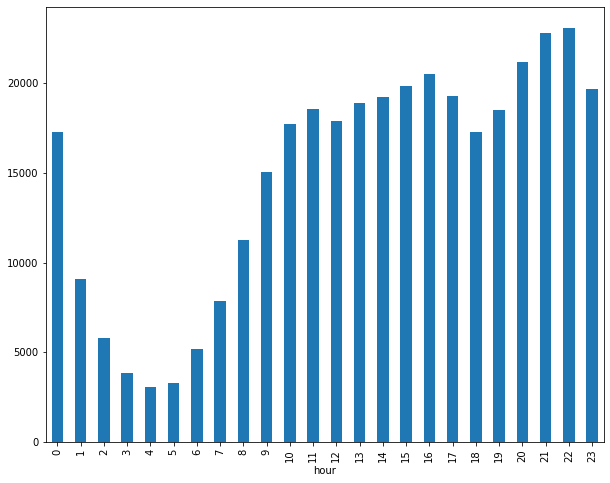

In [ ]:
plt.figure(figsize=(10,8))
df.groupby(by='hour').count()['ip'].plot(kind='bar')

In [ ]:
(df.groupby(by=['month', 'day', 'hour']).count()['ip']).groupby('hour').mean()

hour
0     117.482993
1      61.823129
2      39.394558
3      26.210884
4      20.761905
5      22.306122
6      35.176871
7      53.442177
8      76.408163
9     102.278912
10    120.619048
11    126.224490
12    121.510204
13    128.312925
14    130.666667
15    134.843537
16    139.612245
17    131.265306
18    117.537415
19    125.931973
20    143.986395
21    154.972789
22    156.959184
23    133.741497
Name: ip, dtype: float64

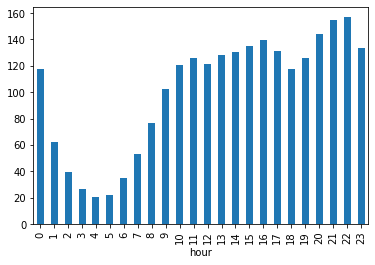

In [ ]:
(df.groupby(by=['month', 'day', 'hour']).count()['ip']).groupby('hour').mean().plot(kind='bar')

In [ ]:
(df.loc[df['weekday'] == 0].groupby(by=['month', 'day', 'hour']).count()['ip']).groupby('hour').mean()

hour
0     122.571429
1      63.904762
2      40.190476
3      26.190476
4      20.428571
5      25.142857
6      39.571429
7      56.619048
8      86.238095
9     114.047619
10    138.571429
11    147.333333
12    136.761905
13    144.523810
14    145.142857
15    151.952381
16    156.238095
17    144.523810
18    124.380952
19    134.142857
20    151.428571
21    168.619048
22    173.619048
23    141.238095
Name: ip, dtype: float64

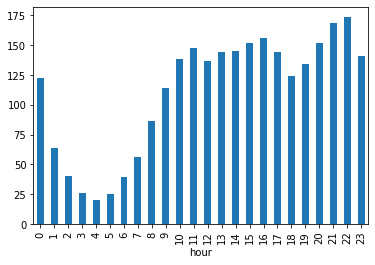

In [ ]:
(df.loc[df['weekday'] == 0].groupby(by=['month', 'day', 'hour']).count()['ip']).groupby('hour').mean().plot(kind='bar')

In [ ]:
(df.loc[df['weekday'] == 5].groupby(by=['month', 'day', 'hour']).count()['ip']).groupby('hour').mean()

hour
0     109.952381
1      62.619048
2      38.380952
3      26.952381
4      20.809524
5      23.809524
6      32.904762
7      50.285714
8      67.952381
9      85.761905
10     94.714286
11    107.333333
12    101.666667
13    107.523810
14    113.476190
15    118.428571
16    120.952381
17    119.476190
18    110.714286
19    122.142857
20    142.857143
21    145.047619
22    136.714286
23    126.523810
Name: ip, dtype: float64

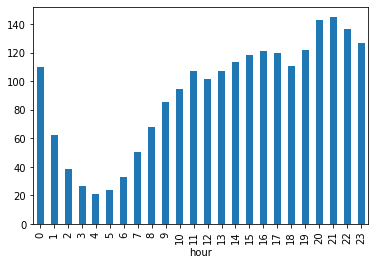

In [ ]:
(df.loc[df['weekday'] == 5].groupby(by=['month', 'day', 'hour']).count()['ip']).groupby('hour').mean().plot(kind='bar')

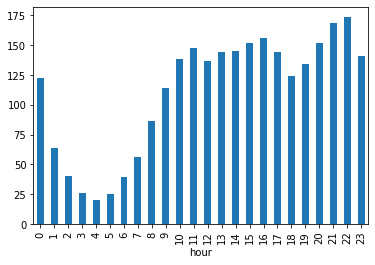

In [ ]:
(df.loc[df['weekday'] == 0].groupby(by=['month', 'day', 'hour']).count()['ip']).groupby('hour').mean().plot(kind='bar')

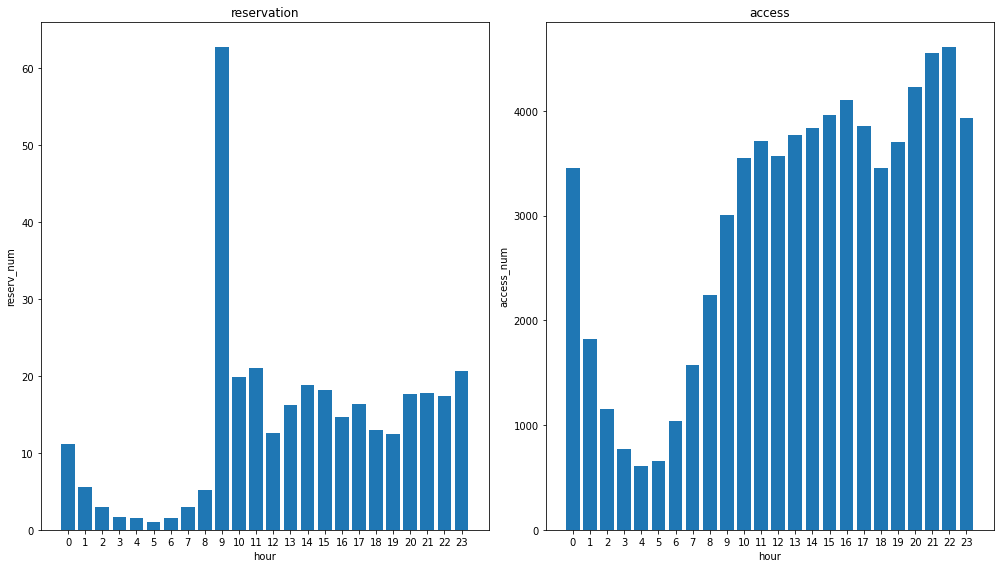

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.title('reservation')
plt.bar((db_df.groupby(['month', 'hour']).count()['reserve_num']).groupby('hour').mean().index, (db_df.groupby(['month', 'hour']).count()['reserve_num']).groupby('hour').mean())
plt.xticks(range(0, 24))
plt.xlabel('hour')
plt.ylabel('reserv_num')

plt.subplot(1, 2, 2)
plt.title('access')
plt.bar((df.groupby(['month', 'hour']).count()['ip']).groupby('hour').mean().index, (df.groupby(['month', 'hour']).count()['ip']).groupby('hour').mean())
plt.xticks(range(0, 24))
plt.xlabel('hour')
plt.ylabel('access_num')
plt.tight_layout()
plt.show()

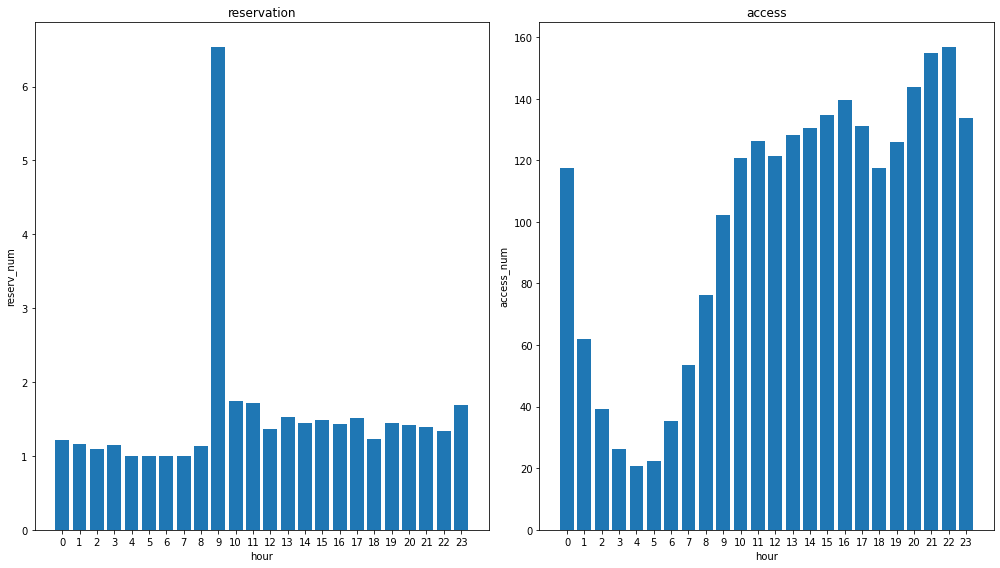

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.title('reservation')
plt.bar((db_df.groupby(['month', 'day', 'hour']).count()['reserve_num']).groupby('hour').mean().index, (db_df.groupby(['month', 'day', 'hour']).count()['reserve_num']).groupby('hour').mean())
plt.xticks(range(0, 24))
plt.xlabel('hour')
plt.ylabel('reserv_num')

plt.subplot(1, 2, 2)
plt.title('access')
plt.bar((df.groupby(['month', 'day', 'hour']).count()['ip']).groupby('hour').mean().index, (df.groupby(['month', 'day', 'hour']).count()['ip']).groupby('hour').mean())
plt.xticks(range(0, 24))
plt.xlabel('hour')
plt.ylabel('access_num')
plt.tight_layout()
plt.show()


 1. 09시경 일평균/월평균 모두 09시에 가장 높은 예약건을 보여줌
 2. 그 외 새벽 시간대에는 가장 낮은 예약건수를 보여줌
 

## 호텔별 예약자 추이

In [ ]:
podo_df = pd.DataFrame()
podo_df['reserve_users'] = db_df[db_df['hotel_name'] == 'PODO'].groupby('hour').count()['reserve_num']
podo_df['access_users'] = df.groupby('hour').count()['ip']
podo_df['reserve_rate'] = podo_df['reserve_users'] / podo_df['access_users']
podo_df

,reserve_users,access_users,reserve_rate
hour,,,
0,21,17270,0.001216
1,10,9088,0.001100
2,5,5791,0.000863
3,5,3853,0.001298
4,1,3052,0.000328
5,1,3279,0.000305
6,1,5171,0.000193
7,4,7856,0.000509
8,15,11232,0.001335


In [ ]:
annex_df = pd.DataFrame()
annex_df['reserve_users'] = db_df[db_df['hotel_name'] == 'THEANNEX'].groupby('hour').count()['reserve_num']
annex_df['access_users'] = df.groupby('hour').count()['ip']
annex_df['reserve_rate'] = annex_df['reserve_users'] / annex_df['access_users']
annex_df

,reserve_users,access_users,reserve_rate
hour,,,
0,35,17270,0.002027
1,18,9088,0.001981
2,7,5791,0.001209
3,3,3853,0.000779
4,2,3052,0.000655
6,5,5171,0.000967
7,8,7856,0.001018
8,11,11232,0.000979
9,53,15035,0.003525


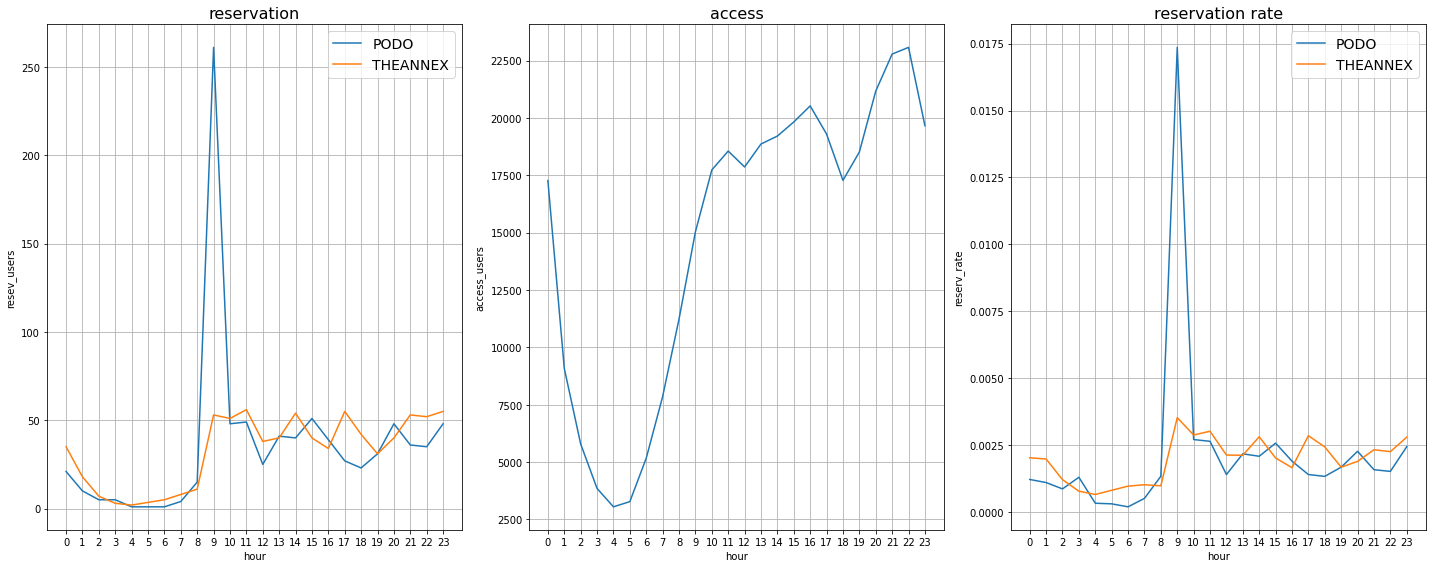

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('reservation', fontsize=16)
plt.plot(podo_df.index, podo_df['reserve_users'], label='PODO')
plt.plot(annex_df.index, annex_df['reserve_users'], label='THEANNEX')
plt.xticks(range(24))
plt.xlabel('hour')
plt.ylabel('resev_users')
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.title('access', fontsize=16)
plt.plot(podo_df.index, podo_df['access_users'])
plt.xticks(range(24))
plt.xlabel('hour')
plt.ylabel('access_users')
plt.grid()
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.title('reservation rate', fontsize=16)
plt.plot(podo_df.index, podo_df['reserve_rate'], label='PODO')
plt.plot(annex_df.index, annex_df['reserve_rate'], label='THEANNEX')
plt.xticks(range(24))
plt.xlabel('hour')
plt.ylabel('reserv_rate')
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()

plt.show()

 1. 09시경 예약건수가 늘어나는 이유는 각 예약 Open 시작일시가 09시이기 때문인 것으로 추정됨


In [ ]:
temp_ = db_df.groupby(['month', 'day', 'hour']).count()[['reserve_num']]

In [ ]:
temp_.index

MultiIndex([(1,  5, 14),
            (1,  5, 15),
            (1,  5, 22),
            (1,  6,  8),
            (1,  7, 22),
            (1,  8, 14),
            (1,  8, 16),
            (1,  8, 23),
            (1,  9,  9),
            (1,  9, 18),
            ...
            (5, 29, 11),
            (5, 29, 13),
            (5, 29, 15),
            (5, 29, 16),
            (5, 29, 17),
            (5, 30,  0),
            (5, 30,  9),
            (5, 30, 15),
            (5, 30, 20),
            (5, 30, 22)],
           names=['month', 'day', 'hour'], length=977)

In [ ]:
temp_.head()

reserve_num
month day hour             
1     5   14              2
          15              1
          22              1
      6   8               1
      7   22              1

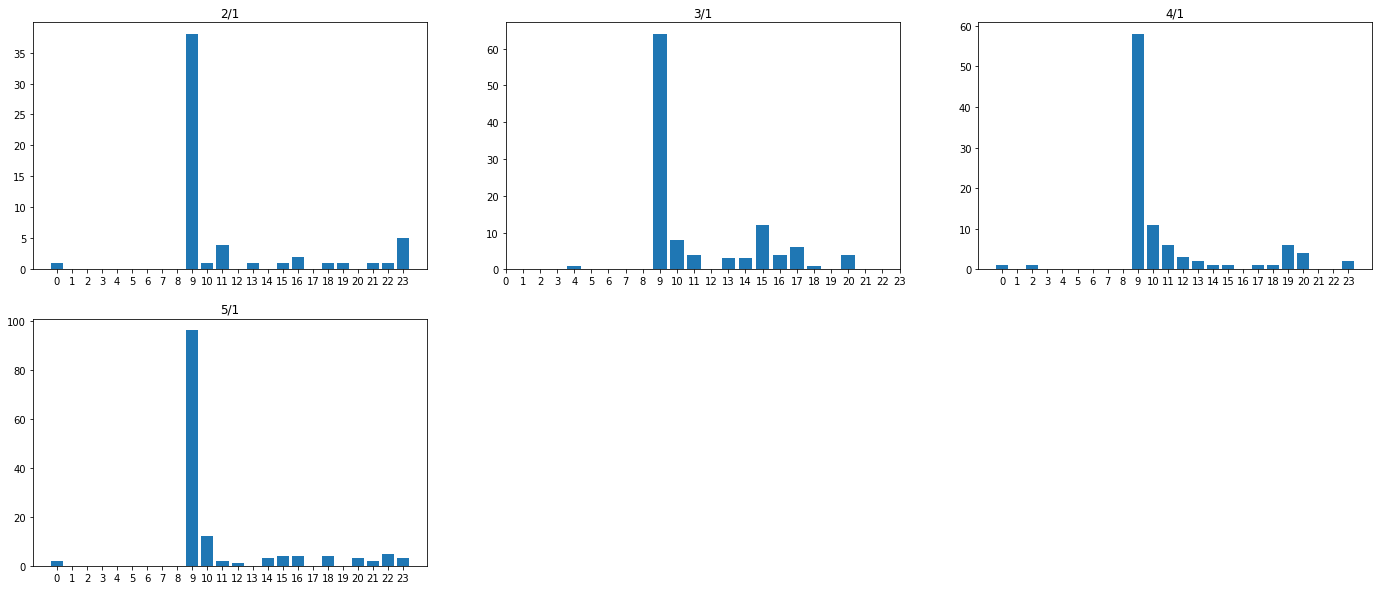

In [ ]:
plt.figure(figsize=(24, 10))
n = 1
for month in range(2, 6):
    day = 1
    plt.subplot(2, 3 ,n)
    plt.title('{}/{}'.format(month, day))
    plt.bar(temp_.loc[(month, day, ), 'reserve_num'].index, temp_.loc[(month, day, ), 'reserve_num'])
    plt.xticks(range(24))
    n += 1

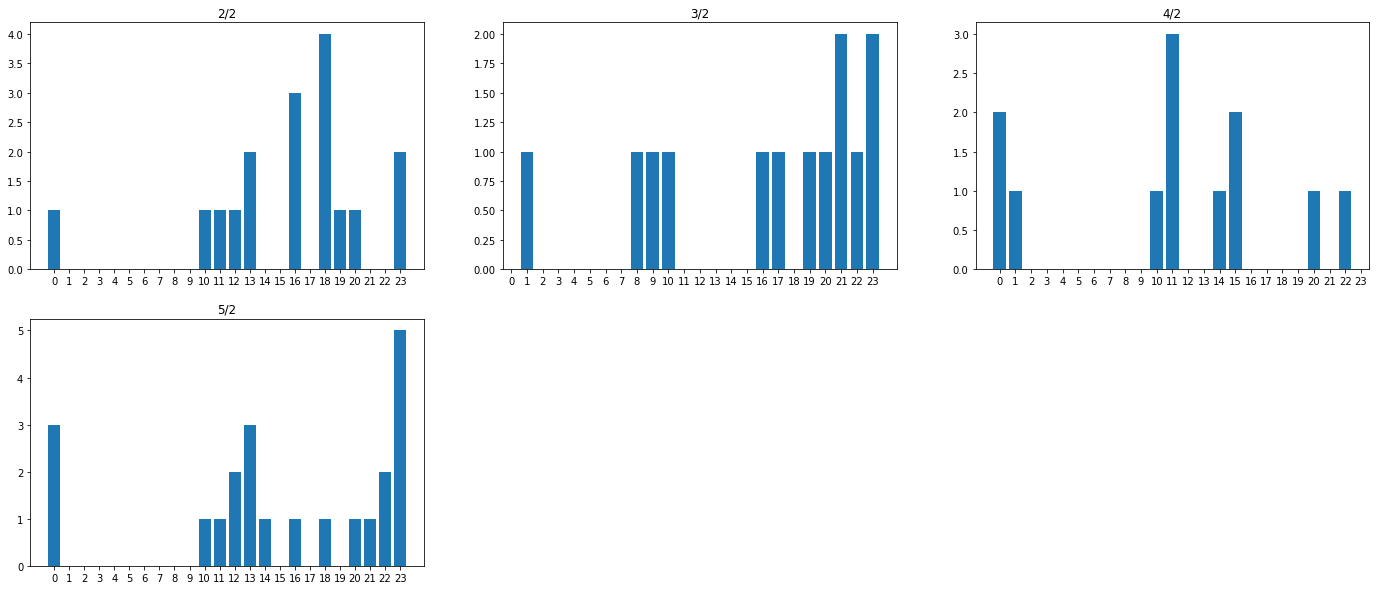

In [ ]:
plt.figure(figsize=(24, 10))
n = 1
for month in range(2, 6):
    day = 2
    plt.subplot(2, 3 ,n)
    plt.title('{}/{}'.format(month, day))
    plt.bar(temp_.loc[(month, day, ), 'reserve_num'].index, temp_.loc[(month, day, ), 'reserve_num'])
    plt.xticks(range(24))
    n += 1

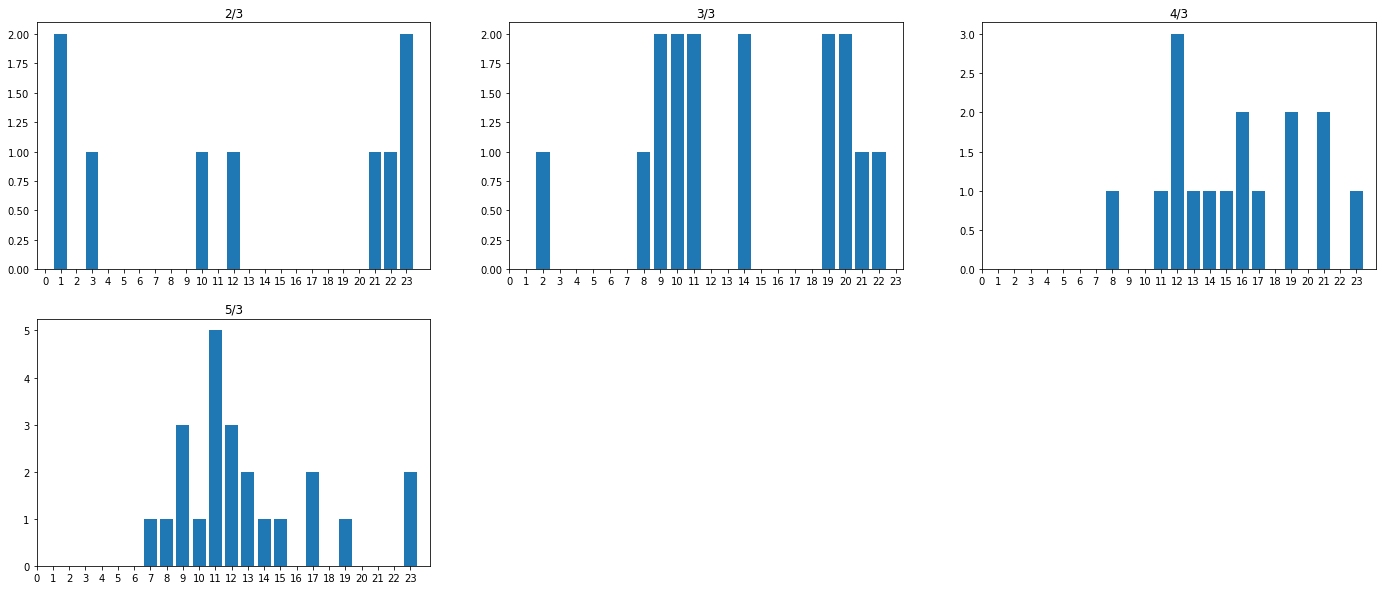

In [ ]:
plt.figure(figsize=(24, 10))
n = 1
for month in range(2, 6):
    day = 3
    plt.subplot(2, 3 ,n)
    plt.title('{}/{}'.format(month, day))
    plt.bar(temp_.loc[(month, day, ), 'reserve_num'].index, temp_.loc[(month, day, ), 'reserve_num'])
    plt.xticks(range(24))
    n += 1

 1. 매월 1일 Open 시작 일시인 09시에 가장 많은 예약자가 몰리는 것을 확인할 수 있음
 2. 즉 매월 1일 09시가 가장 예약자가 많이 발생하는 날임
 3. 1~5월까지의 1일자는 각각 (금, 월, 월, 목, 토)로 월요일이 총 2번 몰려있어 월요일에 예약자 분포가 높게 형성되는 것으로 파악됨
 4. 결과적으로 현재로서는 예약에 가장 많은 영향을 주는 것은 예약 일정 Open 일로 추정됨